In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
from keras.layers import Flatten
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("data/D1.csv",date_parser = True)

In [4]:
X = data.drop(['Days','Output'],axis =1)
y = data['Output']

In [5]:
N_data = len(X)

In [6]:
N_train=int(0.86*N_data)
N_train

64

In [7]:
N_test = N_data-N_train
N_test

11

In [8]:
X_train = X.iloc[0:N_train,:]

In [9]:
X_test = X.iloc[N_train+1:N_data-1,:]

In [10]:
y_train = y.iloc[0:N_train]

In [11]:
y_test =y.iloc[N_train+1:N_data-1]

In [12]:
mlp = MLPRegressor(
    hidden_layer_sizes=(25,15,30,25),  
    activation='relu', 
    solver='adam', 
    alpha=0.001, 
    batch_size=16,
    learning_rate='constant', 
    learning_rate_init=0.01, 
    power_t=0.5, 
    max_iter=100, 
    shuffle=True,
    random_state=9, 
    tol=0.0001, 
    verbose=False, 
    warm_start=False, 
    momentum=0.9, 
    nesterovs_momentum=True,
    early_stopping=False, 
    validation_fraction=0.1,
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-08)


In [13]:
mlp.fit(X_train,y_train)

MLPRegressor(alpha=0.001, batch_size=16, hidden_layer_sizes=(25, 15, 30, 25),
             learning_rate_init=0.01, max_iter=100, random_state=9)

In [14]:
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp

array([3822.32467763, 3893.31995787, 4064.00565903, 3999.27956961,
       3950.02278796, 4047.48966994, 4007.28504033, 3987.06853978,
       4109.09802609])

In [15]:
print("R^2={}".format(mlp.score(X_test,y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred_mlp))
print("RMSE ={}".format(rmse))

R^2=-1.9063433530644347
RMSE =379.4388790458772


In [16]:
y_test_pred_mlp = pd.DataFrame({'y_test' : y_test,'y_pred_mlp':y_pred_mlp},index=X_test.index)

<function matplotlib.pyplot.show(close=None, block=None)>

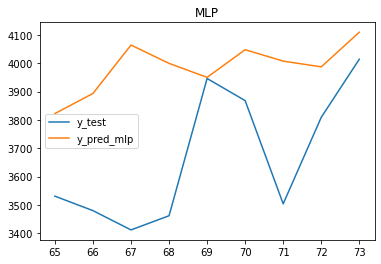

In [17]:
y_test_pred_mlp.plot(legend=True)
plt.title("MLP")
plt.show